## 1. Import Libraries

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import eda_helper_functions

from sklearn.ensemble import IsolationForest

In [48]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.4 kB 131.3 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/301.4 kB 146.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 178.6 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/301.4 kB 219.0 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/301.4 kB 219.0 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/301.4 kB 219.0 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.4 kB 171.1 kB/s eta 0:00:02
   ---------------- --------------------- 133.1/301.4 kB 315.1 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.4 kB 328.1 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.4 kB 318.1 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/301.4 kB 

## 2. Read the Training Data

In [32]:
PROJECT_DIR = r'C:\Users\harsh\OneDrive\Desktop\Flight-Price-Prediction'
DATA_DIR = 'data'

def read_data(name):

    file_name = f"{name}.csv"
    
    file_path = os.path.join(PROJECT_DIR,DATA_DIR,file_name)
    return pd.read_csv(file_path)



In [33]:
train_df = read_data('train')

In [34]:
train_df.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [40]:
train_df = train_df.assign(**{

    col : pd.to_datetime(train_df.loc[:,col])
    for col in ['date_of_journey','dep_time','arrival_time']
}
    
)

C:\Users\harsh\AppData\Local\Temp\ipykernel_67244\1919451806.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col : pd.to_datetime(train_df.loc[:,col])
C:\Users\harsh\AppData\Local\Temp\ipykernel_67244\1919451806.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col : pd.to_datetime(train_df.loc[:,col])


In [43]:
train_df.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [58]:
(
    train_df
    .select_dtypes(include = 'number')
    .describe()
)

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,637.984375,0.815625,9071.764063
std,496.850172,0.652722,4694.645068
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5567.500000
50%,552.500000,1.000000,8274.500000
75%,911.250000,1.000000,12192.000000
max,2820.000000,3.000000,52229.000000


In [60]:
train_df.describe(include = 'O')

,airline,source,destination,additional_info
count,640,640,640,640
unique,10,5,6,4
top,Jet Airways,Delhi,Cochin,No info
freq,195,272,272,523


In [63]:
(
    train_df
    .assign(
        total_stops = train_df.total_stops.astype(object)  
    )
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-12,Kolkata,Banglore,2024-05-12 18:55:00,2024-05-12 18:15:00,1400,1.0,In-flight meal not included,8529
1,Indigo,2019-03-18,Mumbai,Hyderabad,2024-05-12 06:20:00,2024-05-12 07:45:00,85,0.0,No info,3342
2,Jet Airways,2019-06-09,Kolkata,Banglore,2024-05-12 09:35:00,2024-05-12 22:05:00,750,1.0,In-flight meal not included,13994
3,Jet Airways,2019-06-06,Kolkata,Banglore,2024-05-12 20:25:00,2024-05-12 09:45:00,800,1.0,In-flight meal not included,10539
4,Indigo,2019-03-24,Banglore,New Delhi,2024-05-12 08:30:00,2024-05-12 11:30:00,180,0.0,No info,7303
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-06,Delhi,Cochin,2024-05-12 11:40:00,2024-05-12 19:15:00,455,1.0,No info,15353
636,Indigo,2019-03-03,Delhi,Cochin,2024-05-12 10:45:00,2024-05-12 01:35:00,890,1.0,No info,14871
637,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-12 19:15:00,2024-05-12 19:00:00,1425,1.0,In-flight meal not included,10262
638,Air Asia,2019-04-21,Delhi,Cochin,2024-05-12 07:55:00,2024-05-12 13:25:00,330,1.0,No info,7452


In [62]:
train_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-12,Kolkata,Banglore,2024-05-12 18:55:00,2024-05-12 18:15:00,1400,1.0,In-flight meal not included,8529
1,Indigo,2019-03-18,Mumbai,Hyderabad,2024-05-12 06:20:00,2024-05-12 07:45:00,85,0.0,No info,3342
2,Jet Airways,2019-06-09,Kolkata,Banglore,2024-05-12 09:35:00,2024-05-12 22:05:00,750,1.0,In-flight meal not included,13994
3,Jet Airways,2019-06-06,Kolkata,Banglore,2024-05-12 20:25:00,2024-05-12 09:45:00,800,1.0,In-flight meal not included,10539
4,Indigo,2019-03-24,Banglore,New Delhi,2024-05-12 08:30:00,2024-05-12 11:30:00,180,0.0,No info,7303
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-06,Delhi,Cochin,2024-05-12 11:40:00,2024-05-12 19:15:00,455,1.0,No info,15353
636,Indigo,2019-03-03,Delhi,Cochin,2024-05-12 10:45:00,2024-05-12 01:35:00,890,1.0,No info,14871
637,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-12 19:15:00,2024-05-12 19:00:00,1425,1.0,In-flight meal not included,10262
638,Air Asia,2019-04-21,Delhi,Cochin,2024-05-12 07:55:00,2024-05-12 13:25:00,330,1.0,No info,7452


## 4. High-Level Analysis of Missing Values

In [81]:
def missing_info(df):
    na_cols = [col for col in df.columns if df[col].isna().any()]
    na_counts = [df[col].isna().sum() for col in na_cols]
    na_pct = [(df[col].isna().mean() * 100) for col in na_cols]
    

    return (

        pd
        .DataFrame(df = {

            'Variable' : na_cols,
            'count' : na_counts,
            'percentage': na_pct
        })
        .sort_values(by = 'count',ascending = False)
        .set_index('Variable')

    )



In [82]:
missing_info(train_df)

,count,percentage
Variable,,


In [87]:
na_cols = [col for col in train_df.columns if train_df[col].isna().any()]

na_counts = [train_df[col].isna().sum() for col in na_cols]


[]

### 5. High-level Analysis of Outliers

In [89]:
forest = IsolationForest(n_estimators = 10,random_state = 42)

In [91]:
(
    train
    .assign(outlier = forest.fit_predict(train_df
                                         .drop(columns = 'price')
                                         .select_dtypes(include = 'number')))
    .query('outlier == -1')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-06-12,Kolkata,Banglore,2024-05-12 18:55:00,2024-05-12 18:15:00,1400,1.0,In-flight meal not included,8529,-1
1,Indigo,2019-03-18,Mumbai,Hyderabad,2024-05-12 06:20:00,2024-05-12 07:45:00,85,0.0,No info,3342,-1
6,Jet Airways,2019-03-18,Banglore,New Delhi,2024-05-12 08:55:00,2024-05-12 15:15:00,380,1.0,No info,12284,-1
7,Jet Airways,2019-05-12,Mumbai,Hyderabad,2024-05-12 10:20:00,2024-05-12 11:50:00,90,0.0,No info,5678,-1
9,Air India,2019-05-18,Kolkata,Banglore,2024-05-12 05:50:00,2024-05-12 20:25:00,875,2.0,No info,12093,-1
...,...,...,...,...,...,...,...,...,...,...,...
629,Jet Airways,2019-06-03,Delhi,Cochin,2024-05-12 11:40:00,2024-05-12 19:00:00,440,2.0,In-flight meal not included,15812,-1
631,Spicejet,2019-03-24,Mumbai,Hyderabad,2024-05-12 13:10:00,2024-05-12 14:30:00,80,0.0,No info,2753,-1
634,Indigo,2019-04-09,Kolkata,Banglore,2024-05-12 19:35:00,2024-05-12 00:10:00,275,1.0,No info,4860,-1
637,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-12 19:15:00,2024-05-12 19:00:00,1425,1.0,In-flight meal not included,10262,-1


### 6. Pair Plots

In [96]:
def pair_plots(data,height = 3, aspect = 1.5,hue = None, legend = False):

    pairgrid = sns.PairGrid(

                data = data,
                aspect = aspect,
                height = height,
                hue = hue,
                corner = True
    )

    return pairgrid.map_lower(sns.scatterplot)

            

        

        
    
    

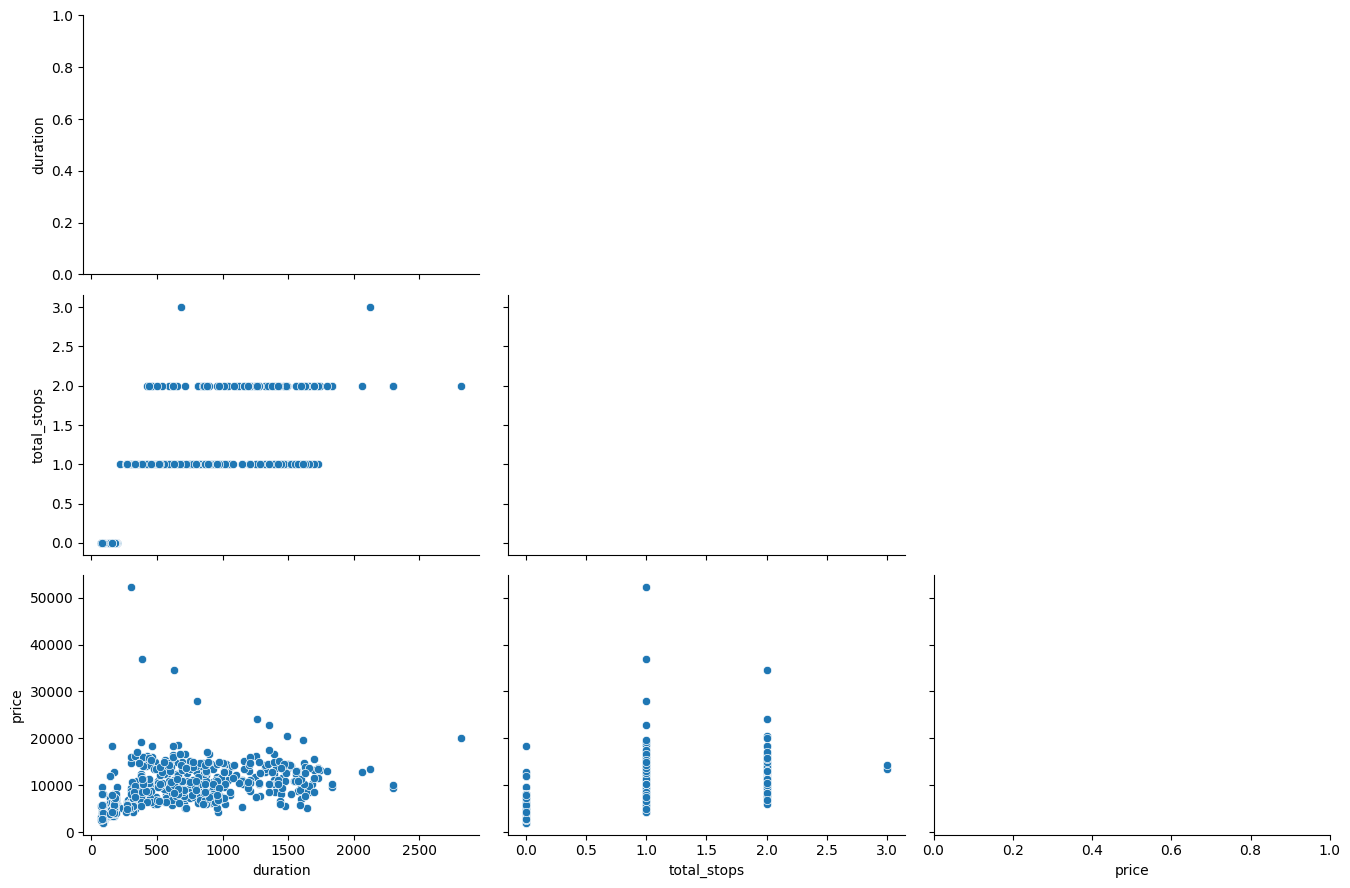

In [97]:
pair_plots(train_df)

<Axes: >

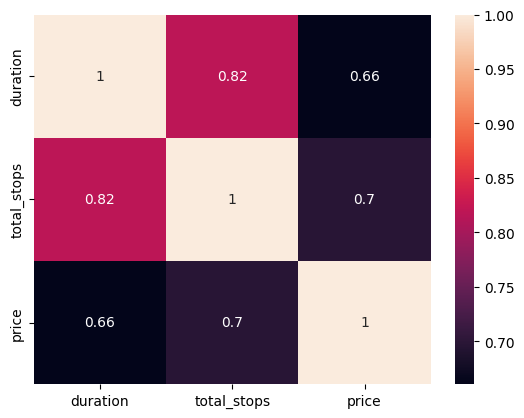

In [102]:
sns.heatmap(train_df.corr(numeric_only = True,method = 'spearman'),annot = True)

### 8. Detailed Analysis

In [103]:
train_df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline

In [104]:
(
    train_df
    .airline
)

0            Jet Airways
1                 Indigo
2            Jet Airways
3            Jet Airways
4                 Indigo
             ...        
635    Multiple Carriers
636               Indigo
637          Jet Airways
638             Air Asia
639               Indigo
Name: airline, Length: 640, dtype: object

In [105]:
from IPython.display import display,HTML

In [115]:
def cat_summary(df,var):
    import warnings
    warnings.filterwarnings('ignore')


    col = df.loc[:,var].copy()
    display_html(2,var)

    display_html(3, 'Quick Glance')
    display(col)

    display_html(3, 'Meta-data')
    print(f"{'Data Type':15} : {col.dtype}")
    print(f"{'Cardinality':15} : {col.nunique(dropna = True)} categories")
    print(f"{'Missing Data':15} : {col.isna().sum()} rows ({col.isna().mean() * 100:.2f}%)")
    print(f"{'Available Data':15} : {col.count():,}/{len(col):,} rows")



    display_html(3, "Summary")
    display(

        col
        .describe()
        .rename("")
        .to_frame()

        
    )










In [110]:
def display_html(size=3, content="content"):
  display(HTML(f"<h{size}>{content}</h{size}>"))

In [116]:
cat_summary(train_df,'airline')

0            Jet Airways
1                 Indigo
2            Jet Airways
3            Jet Airways
4                 Indigo
             ...        
635    Multiple Carriers
636               Indigo
637          Jet Airways
638             Air Asia
639               Indigo
Name: airline, Length: 640, dtype: object

Data Type       : object
Cardinality     : 10 categories
Missing Data    : 0 rows (0.00%)
Available Data  : 640/640 rows


,
count,640
unique,10
top,Jet Airways
freq,195


In [117]:
from matplotlib.gridspec import GridSpec

from wordcloud import WordCloud, STOPWORDS

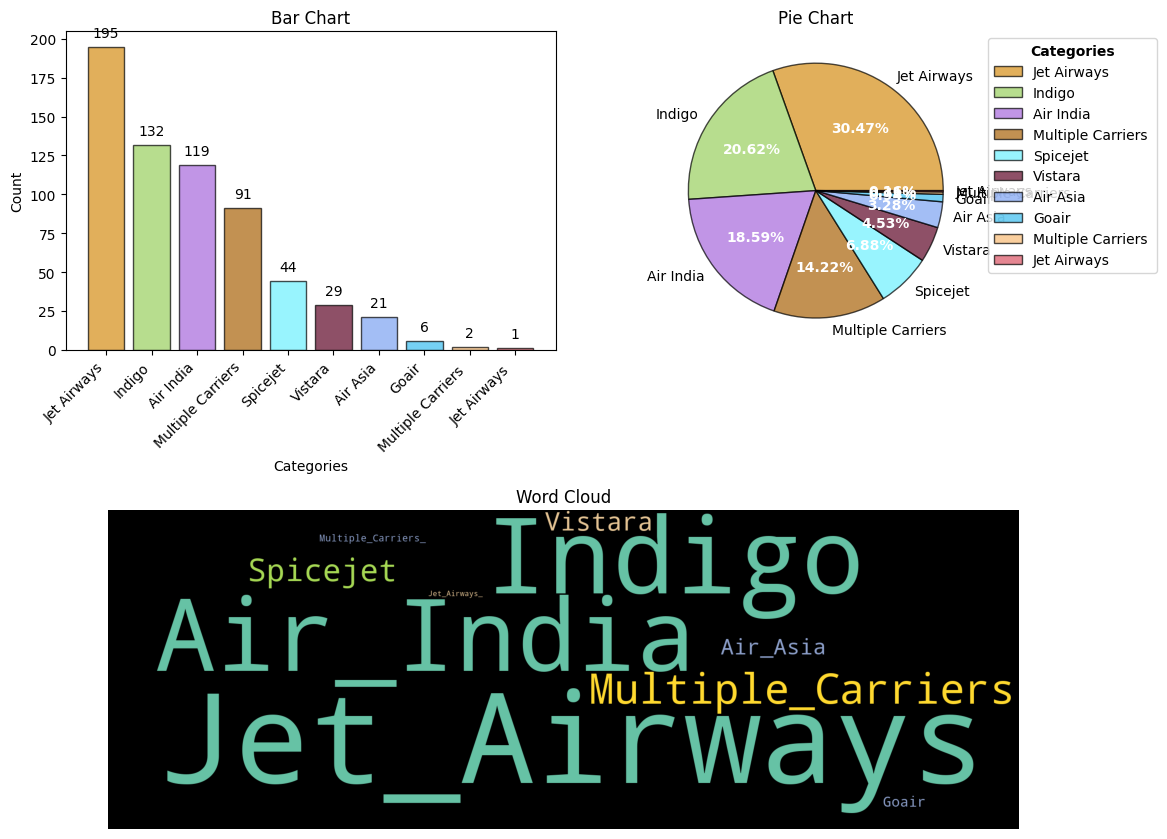

In [122]:
eda_helper_functions.cat_univar_plots(train_df,'airline')

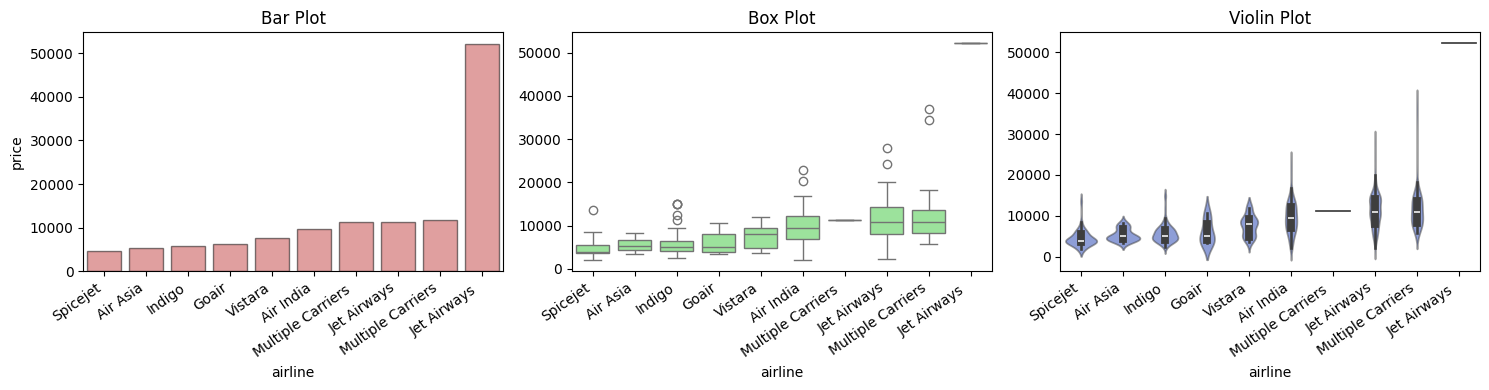

In [126]:
eda_helper_functions.num_cat_bivar_plots(
    data = train_df,
    num_var = 'price',
    cat_var = 'airline'
)

In [127]:
eda_helper_functions.num_cat_hyp_testing(train,'price','airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 56.25693612051375
- p-value              : 5.983566036914615e-75
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 281.1205160483777
- p-value              : 2.619398047303481e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


In [128]:
def num_cat_hyp_testing(data, num_var, cat_var, alpha=0.05):
  display_html(2, f"Hypothesis Test for Association between {num_var} and {cat_var}")

  groups_df = (
      data
      .dropna(subset=[num_var])
      .groupby(cat_var)
  )
  groups = [group[num_var].values for _, group in groups_df]

In [133]:
groups_df = (
      train_df
      .dropna(subset=['price'])
      .groupby('airline')
)

groups = [group['price'].values for _, group in groups_df]

<Figure size 1200x800 with 0 Axes>

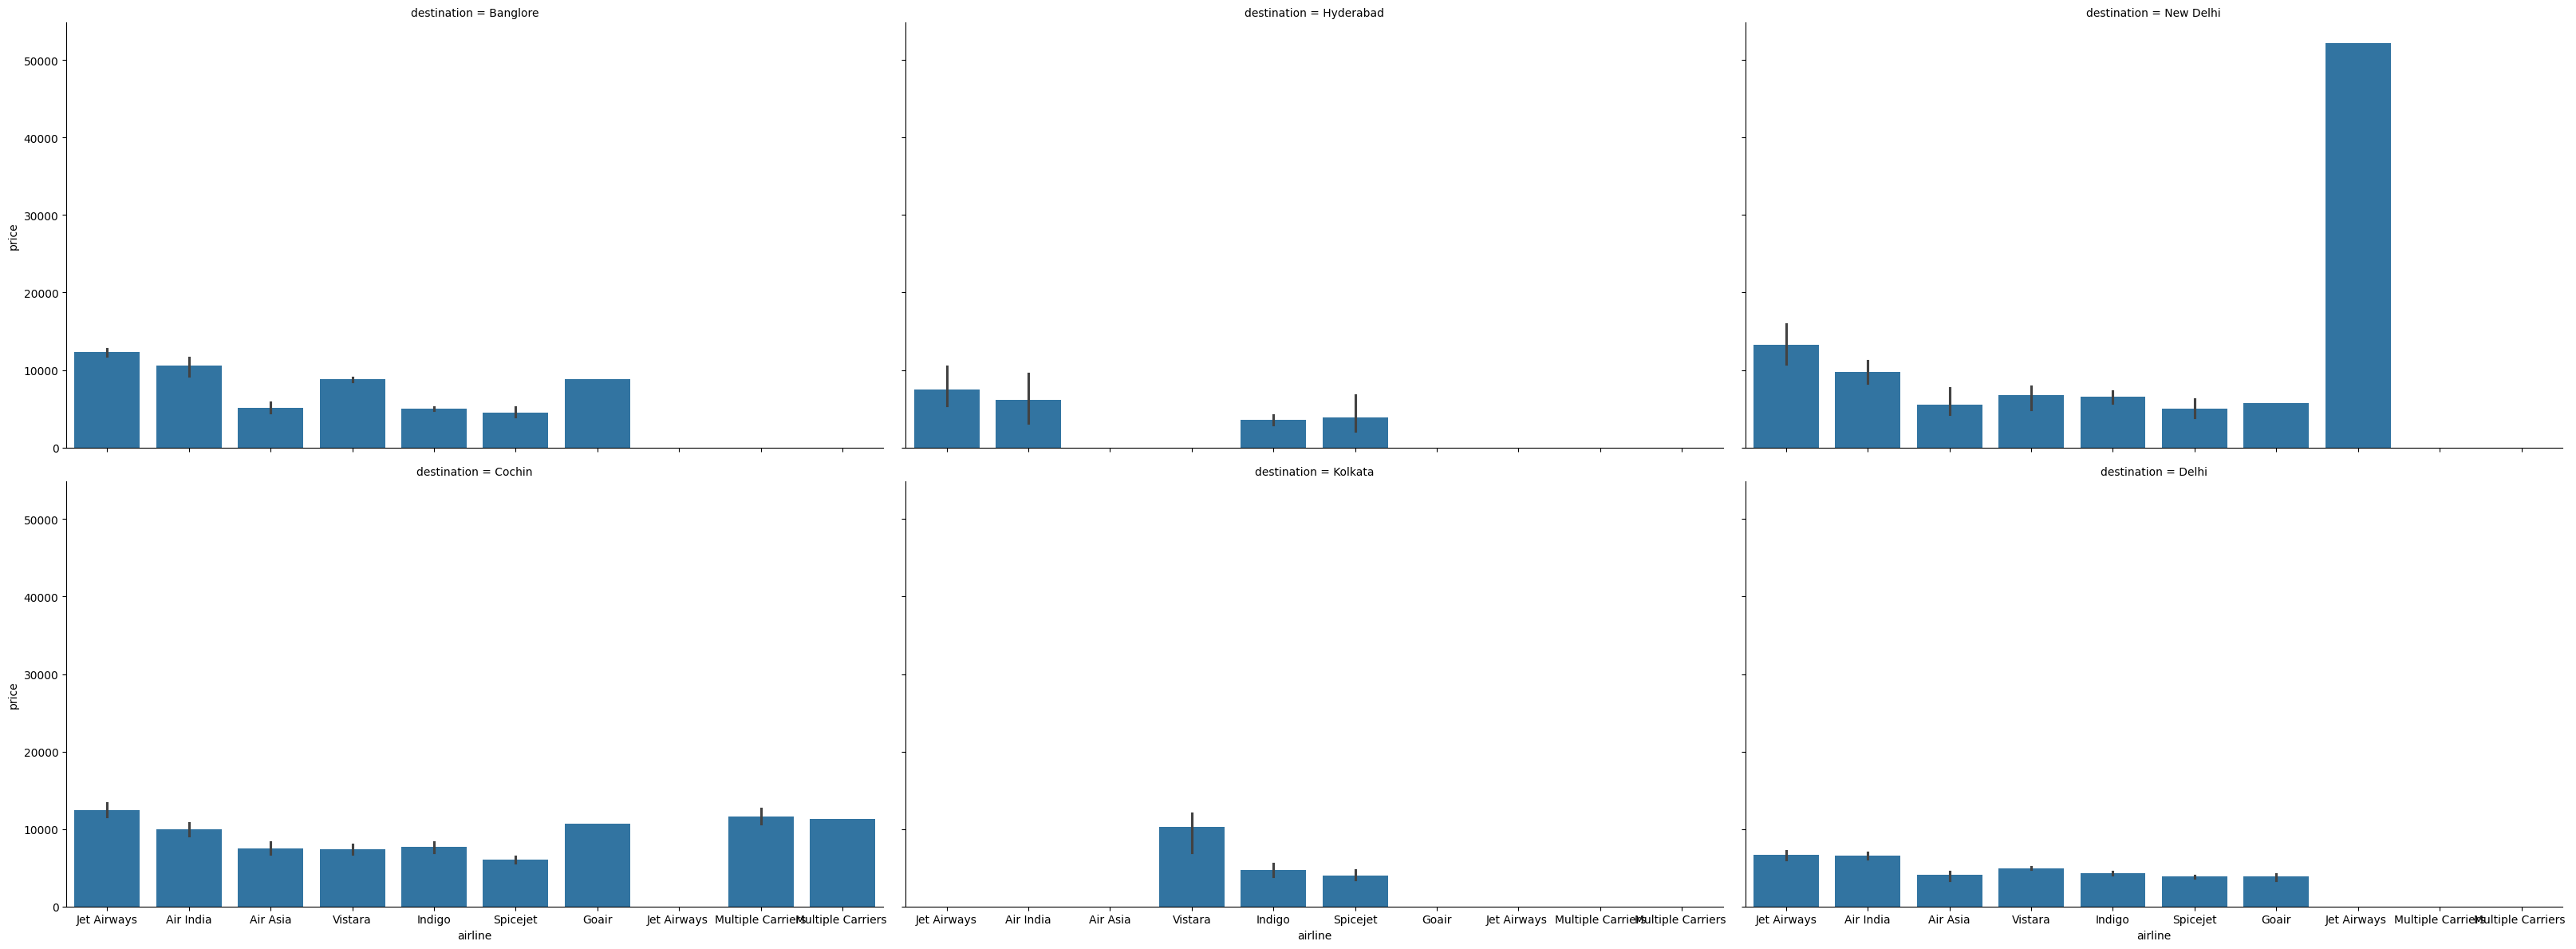

In [141]:
plt.figure(figsize = (12,8))

airline_grid = sns.FacetGrid(
    data = train_df,
    col = 'destination',
    col_wrap = 3,
    height = 6,
    aspect = 1.8,
    sharey = True
    
    
    
         
)

airline_grid.map(sns.barplot,'airline','price')

plt.tight_layout()
plt.show()

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

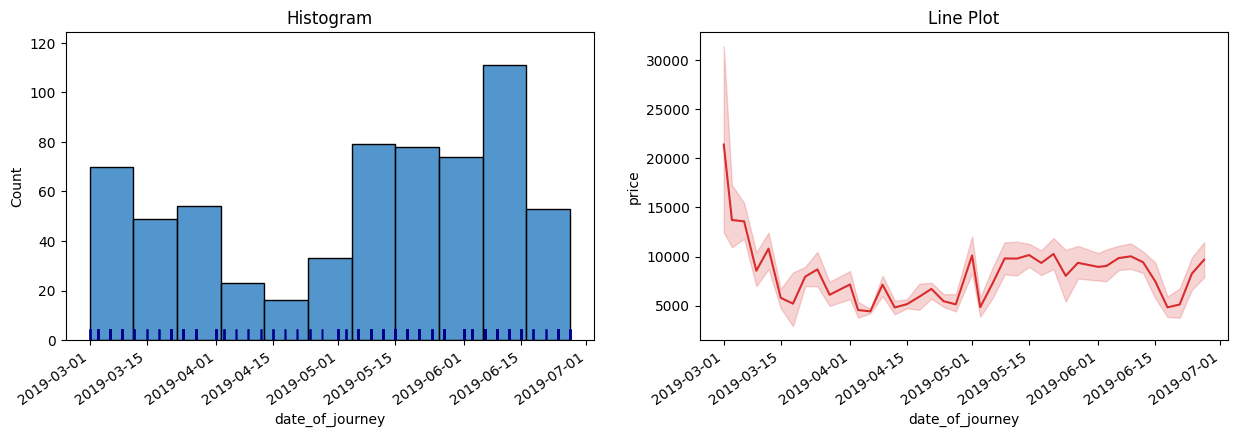

In [143]:
eda_helper_functions.dt_univar_plots(
    data = train_df,
    var = 'date_of_journey',
    target = 'price'
)

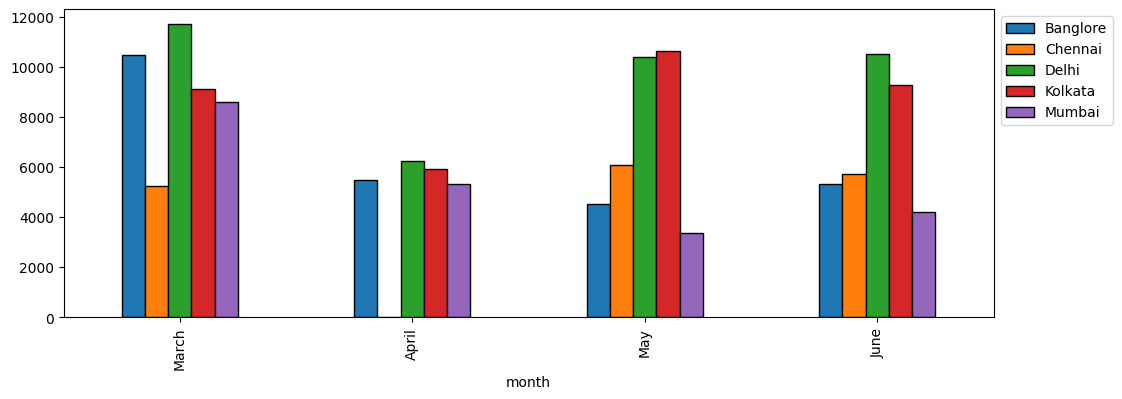

In [151]:
(
    train
    .groupby([pd.Grouper(key = 'date_of_journey', freq = 'M'),'source'])
    .price.mean()
    .unstack(fill_value = 0)
    .set_axis(['March','April','May','June'],axis = 0)
    .rename_axis(index = 'month')
    .plot(
        kind = 'bar',
        figsize = (12,4),
        edgecolor = 'black'
        
    )
)

ax = plt.gca()
ax.legend(
    loc = 'upper left',
    bbox_to_anchor = (1,1)
)

In [152]:
train_df.dep_time

0     2024-05-12 18:55:00
1     2024-05-12 06:20:00
2     2024-05-12 09:35:00
3     2024-05-12 20:25:00
4     2024-05-12 08:30:00
              ...        
635   2024-05-12 11:40:00
636   2024-05-12 10:45:00
637   2024-05-12 19:15:00
638   2024-05-12 07:55:00
639   2024-05-12 04:40:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

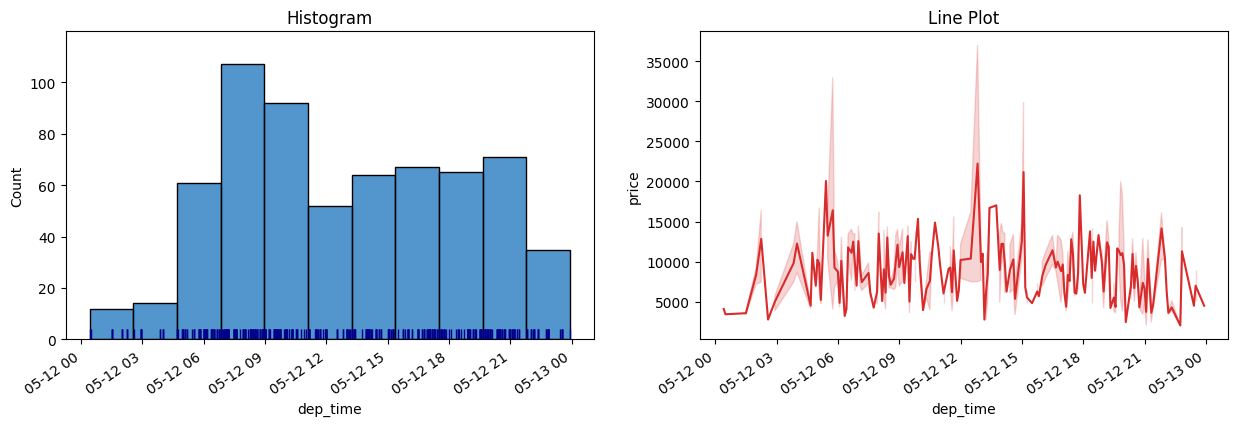

In [153]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price')

In [158]:
(
    train
    .dep_time
    .dt.hour
    .pipe(lambda ser : pd.Series(np.select([ser.between(4,12,inclusive = 'left'),
                                 ser.between(12,16,inclusive = 'left'),
                                 ser.between(16,20,inclusive = 'left')],
                                ['morning',
                                'afternoon',
                                'evening'],
                                default = 'night')))
)

0      evening
1      morning
2      morning
3        night
4      morning
        ...   
635    morning
636    morning
637    evening
638    morning
639    morning
Length: 640, dtype: object

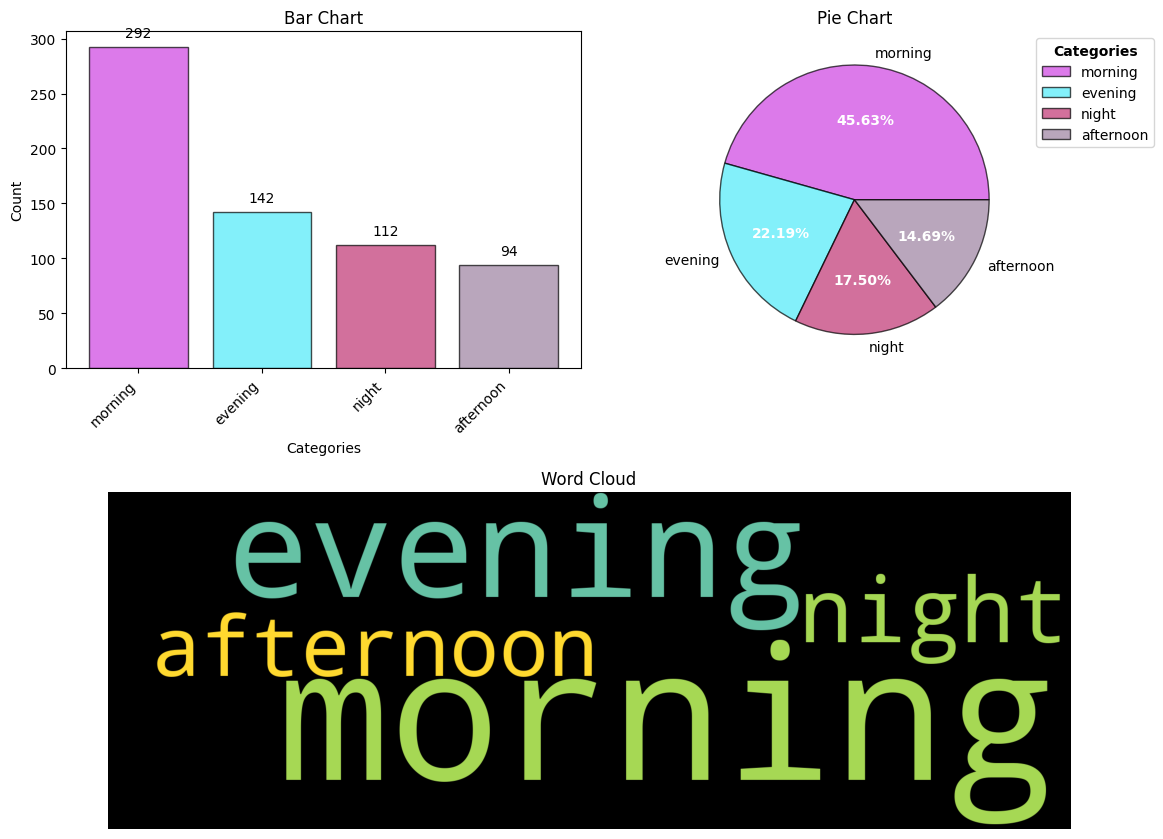

In [161]:
(
    train
    .assign(dep_time = lambda df: pd.Series(np.select(
        [df.dep_time.dt.hour.between(4, 12, inclusive='left'),
         df.dep_time.dt.hour.between(12, 16, inclusive='left'),
         df.dep_time.dt.hour.between(16, 20, inclusive='left')],
        ['morning', 'afternoon', 'evening'],
        default='night'
    )))
    .pipe(eda_helper_functions.cat_univar_plots,'dep_time')
)


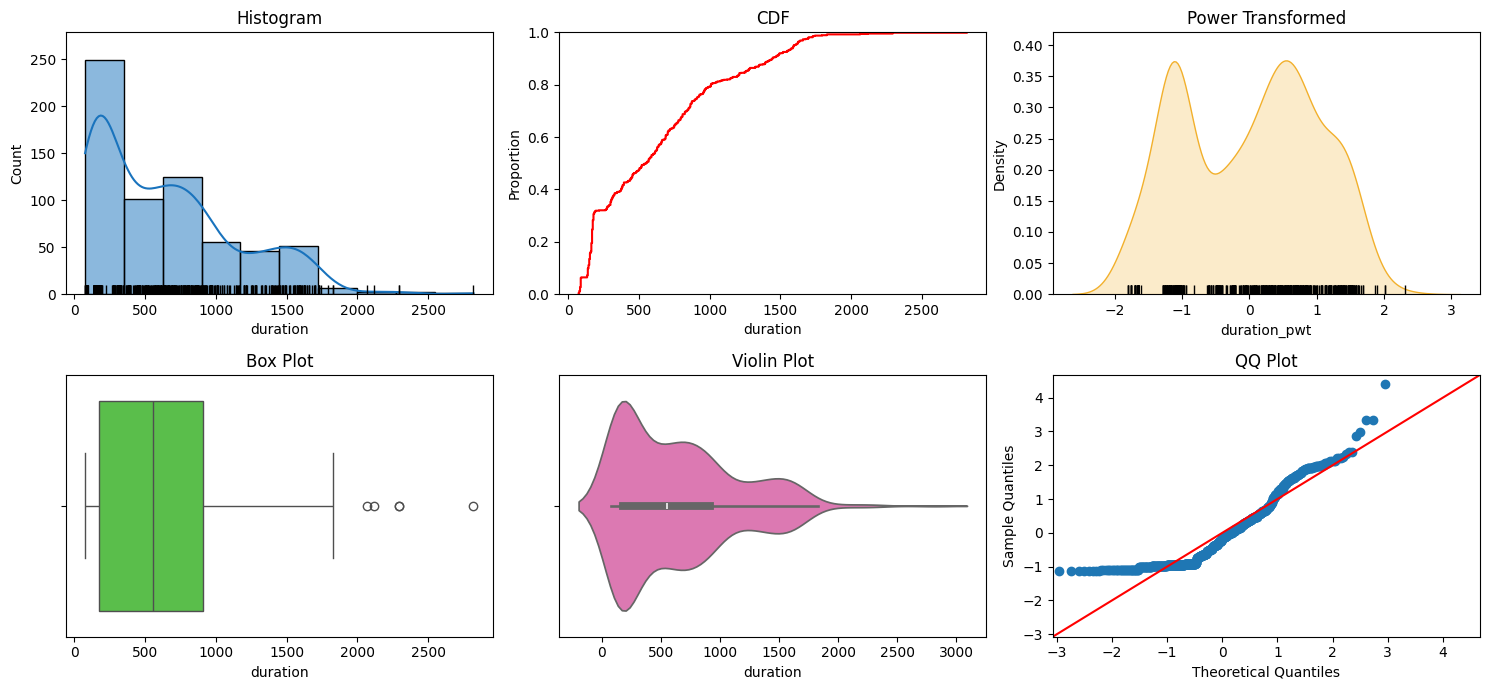

In [162]:
eda_helper_functions.num_univar_plots(train,'duration')

### 9. Automated EDA

In [1]:
from ydata_profiling import ProfileReport

C:\Users\harsh\anaconda3\envs\demo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from .autonotebook import tqdm as notebook_tqdm

ImportError: attempted relative import with no known parent package

In [4]:
!conda update jupyter ipywidgets


Retrieving notices: ...working... done



PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\Users\harsh\anaconda3\envs\demo
  package name: jupyter


